In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv('Global_Pollution_Analysis.csv')
print(df.isnull().sum())

Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64


In [5]:
df.head()


,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
colums = ['CO2_Emissions (in MT)' ,'Industrial_Waste (in tons)' , 'Air_Pollution_Index','Water_Pollution_Index'	,'Soil_Pollution_Index']
scaler.fit(df[colums])
scaler_data = scaler.transform(df[colums])
scaler_d = pd.DataFrame(scaler_data)
scaler_d

,0,1,2,3,4
0,-1.356325,1.543328,1.376167,0.193880,-0.619764
1,-1.284276,0.124915,-1.403578,-1.153098,1.028744
2,1.718910,0.123888,-1.330788,-0.668076,1.142400
3,-1.106232,0.809131,1.494394,-1.009403,0.431675
4,-0.689181,0.882681,-0.021926,0.262567,1.138106
...,...,...,...,...,...
195,-1.387500,-0.124771,-0.968336,-0.765207,-0.862482
196,1.478517,0.802869,-0.878956,0.124351,-0.316683
197,0.940922,-1.843872,-0.461800,0.671106,-0.996342
198,0.273086,0.583847,0.845568,-0.030300,0.643326


In [7]:
from sklearn.preprocessing import LabelEncoder 

ls = LabelEncoder()
df['Country'] = ls.fit_transform(df['Country'])
df['Year'] = ls.fit_transform(df['Year'])


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

avg_pollution = df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']].mean(axis=1)

def classify(avg):
    if avg < 40:
        return 'low'
    elif avg < 70:
        return 'medium'
    else:
        return 'high'

df['Pollution_Level'] = avg_pollution.apply(classify)


# Step 3: Feature & target
X = df[['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index','Industrial_Waste (in tons)']]
y = df['Pollution_Level']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.75

 Confusion Matrix:
 [[43 13]
 [ 2  2]]

 Classification Report:
               precision    recall  f1-score   support

        high       0.96      0.77      0.85        56
      medium       0.13      0.50      0.21         4

    accuracy                           0.75        60
   macro avg       0.54      0.63      0.53        60
weighted avg       0.90      0.75      0.81        60



In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

cv_score = []
k_range = range(1,21)

for k in k_range :
    knn = KNeighborsClassifier(n_neighbors = k )
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_score.append(scores.mean())
    
best_k = k_range[cv_score.index(max(cv_score))]
print("Best K:", best_k)

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average='weighted')*100)
print("Recall:", recall_score(y_test, y_pred,average='weighted')*100)
print("F1 Score:", f1_score(y_test, y_pred,average='weighted')*100)

Best K: 2
Accuracy: 93.33333333333333
Confusion Matrix:
 [[56  0]
 [ 4  0]]
Precision: 87.1111111111111
Recall: 93.33333333333333
F1 Score: 90.11494252873563


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
tree_model = DecisionTreeClassifier()
parameter = {
    'criterion' : ['gini' , 'entropy' , 'log_loss'],
     'splitter' : ['best ', 'random'],
     'max_depth' : [1,2,3,4,5],
    'max_features' :['auto' , 'sqrt' , 'log2'],
    'ccp_alpha' : [1,2,3,4,5,6,7]
}
grid = GridSearchCV(tree_model , param_grid = parameter, cv = 5, scoring = 'accuracy')
grid.fit(X_train,y_train)
grid.best_params_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2100 fits failed out of a total of 3150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1050 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-pac

{'ccp_alpha': 1,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [31]:
y_pred = grid.predict(X_test)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average='weighted'))
print("Recall:", recall_score(y_test, y_pred,average='weighted')*100)
print("F1 Score:", f1_score(y_test, y_pred,average='weighted')*100)

Accuracy: 93.33333333333333
Confusion Matrix:
 [[56  0]
 [ 4  0]]
Precision: 0.8711111111111111
Recall: 93.33333333333333
F1 Score: 90.11494252873563


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


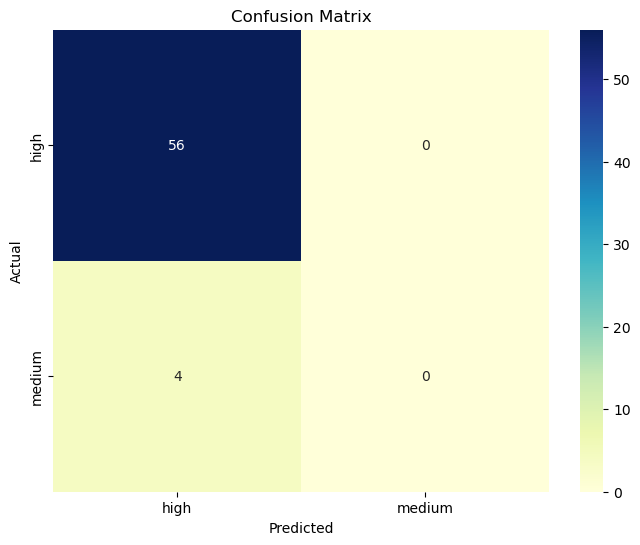

In [34]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()